In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
import itertools

*Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).*

(Выбрано распределение $\\χ^2$ (хи-квадрат) с $k$ степенями свободы.)

*Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.*

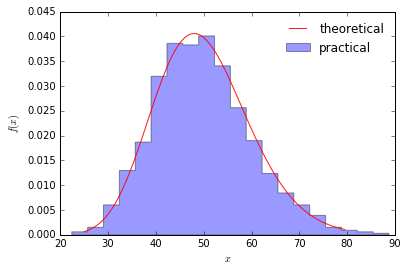

In [2]:
dof = 50 # Столько степеней свободы

# Генерируем выборку из 1000 элементов, строим гистограмму

sample = chi2.rvs(dof, size=1000)
plt.hist(sample, 20, normed=True, histtype='stepfilled', alpha=0.4, label='practical')

# Cтороим теоретическую плотность распределения (поверх изначального графика)
x = np.arange(25.,80.,0.5)
plt.plot(x, chi2.pdf(x, dof),'r', alpha=0.9, label='theoretical')
plt.legend(loc='best', frameon=False)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

*Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.*

In [16]:
size = [5,10,50]
sm = []
bins = np.arange(35.,65.,0.5)
for i in size:
    for _ in itertools.repeat(None, 1000):
        rv = chi2.rvs(dof, size=i)
        sm.append(np.mean(rv))

В общем виде __матожидание__ равняется $EX=k$,а __дисперсия__ $DX=2k$. В нашем случае $k=50$ и, соответственно, __$EX=50$__ и __$DX=100$__. В scipy.stats.norm распределение задается через $\\μ$ и $\\σ$, поэтому мы считаем квадратный корень от $\\DX/n$, где n - размер выборки.

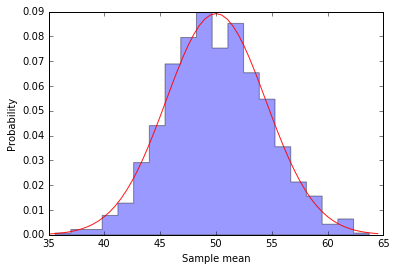

In [20]:
# Строим гистограмму и график нормального распределения для выборки размера 5
plt.hist(sm[0:1000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, dof, np.sqrt(2*dof/5.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

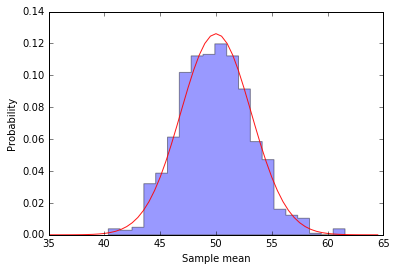

In [22]:
#Cстроим гистограмму и график нормального распределения для выборки размера 10
plt.hist(sm[1000:2000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, dof, np.sqrt(2*dof/10.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

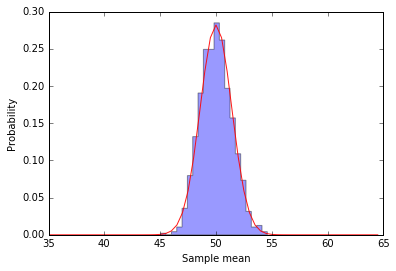

In [23]:
#Строим гистограмму и график нормального распределения для выборки размера 50
plt.hist(sm[2000:3000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, dof, np.sqrt(2*dof/50.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

При увеличении размера выборки n, распределение средних значений начинает сходиться к 50, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.

При этом расчетное нормальное распределение более-менее совпадает с гистограммой, согласно закону больших чисел.